# 2021 인공지능 기말 프로젝트
학번 & 이름: 2016160311 이재윤

## 실험 내용 요약

주어진 데이터를 파악하고 분석하여 각 features를 통해 예측한 값이 최적의 결과를 보이도록 모델을 만든다. 이 때 사용할 분류 모델의 종류는 총 세가지로, Decision Tree와 Logistic Regression, 그리고 Multilayer Perceptron이 이에 해당한다. 이러한 모델들의 성능을 검증하기 위해 train set에 대해 cross validation이 사용되었으며, 최종적인 모델의 평가는 test set을 통해 이루어졌다.

## 데이터 셋 선정

- Wine data

원출처: https://archive.ics.uci.edu/ml/datasets/wine+quality

전처리된 데이터: https://raw.githubusercontent.com/inikoreaackr/datasets/main/wine_quality.csv

## 데이터 셋 파악 및 분석

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/inikoreaackr/datasets/main/wine_quality.csv'
df = pd.read_csv(url)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,best_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,best_quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
best_quality              int64
dtype: object

전처리된 데이터를 기준으로 살펴보았을 때, wine data의 features는 (fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, best_quality)로 총 12개이고, instance의 개수는 총 1599개인 것을 확인할 수 있다.

각 features는 와인의 물리화학적 성분들과 품질을 나타내고 있으며 상세한 의미는 다음과 같다.
- fixed acidity: 와인에서 쉽게 증발하지 않는 산의 정도값으로, 와인의 실제 산도와 연관성이 크다.
- volatile acidity: 와인에서 쉽게 증발하는 산의 정도값으로, 와인의 향에 많은 영향을 준다.
- citric acid: 시트르산. 와인의 신선도에 영향을 준다.
- residual sugar: 잔당(잔여 설탕)값으로, 와인의 단맛을 결정하는 요인이 된다.
- chlorides: 염화물. 주로 와인의 짠맛과 신맛의 정도를 결정해준다.
- free sulfur dioxide: 와인 내에 bound되지 않은 이산화황의 값으로, 이러한 황 화합물들은 와인의 보존도와 관계가 있다.
- total sulfur dioxide: 와인 내에 존재하는 총 이산화황의 값.
- density: 와인의 밀도.
- pH: 와인의 산도.
- sulphates: 와인 내에 존재하는 황산염의 양.
- alcohol: 와인의 도수.
- best_quality: 와인의 품질. 0과 1의 정수값으로 분류한다.

와인의 품질은 0과 1로 전처리되었기 때문에 엄밀하게 말하면 best_quality는 feature가 아닌 label에 해당한다고 볼 수 있다.

분류의 목적은 주어진 features 중 물리화학적 성분들을 통해 와인의 품질을 결정하는 모델을 만들기 위함이다.

In [5]:
df['best_quality'].value_counts()

0    1382
1     217
Name: best_quality, dtype: int64

전체 데이터셋에서 와인의 품질을 0으로 나타낸 instance의 개수는 1382개, 1로 나타낸 instance의 개수는 217개인 것으로 나타났으며 각 features간의 상관관계를 표로 나타내면 다음과 같다.

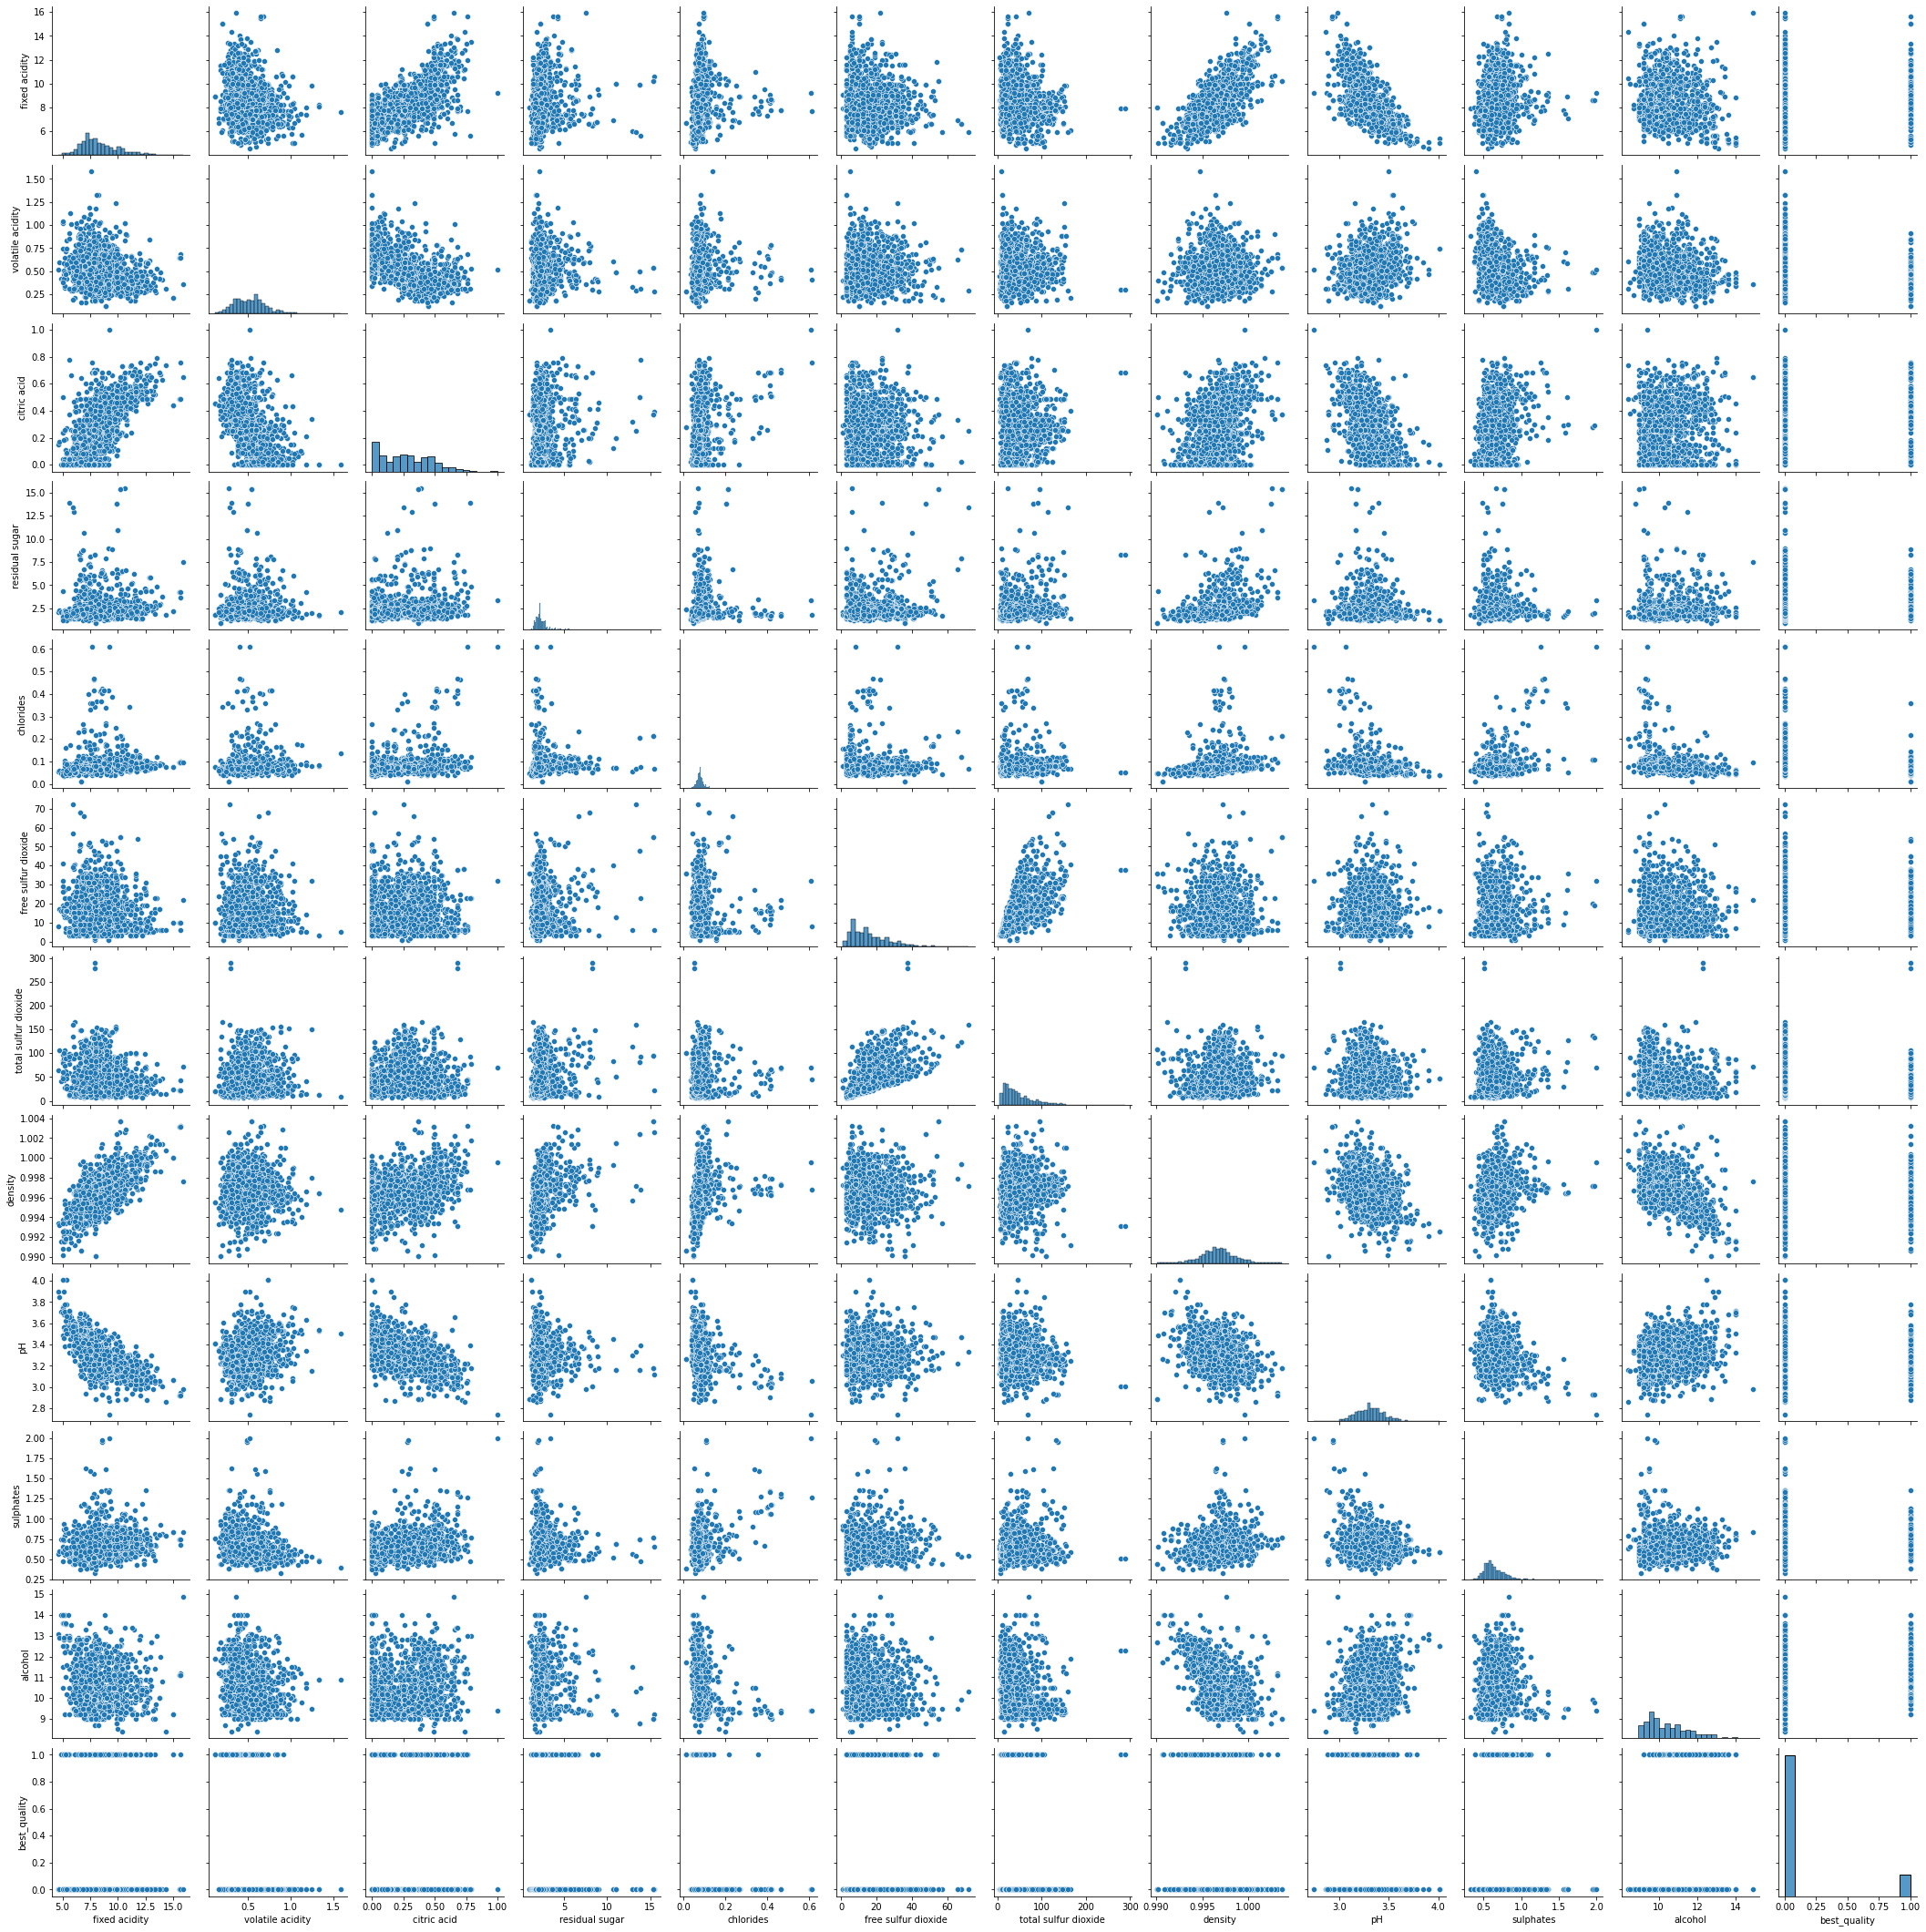

In [6]:
sns.pairplot(df)

위의 표를 통해 알 수 있는 유의미한 상관관계는 다음과 같다.
- fixed acidity는 citric acid 또는 density와 대체로 정비례 관계를 보인다.
- fixed acidity와 pH는 대체로 반비례 관계에 있다.
- free sulfur dioxide와 total sulfur dioxide는 정비례 관계에 있다.

## 실험 설계 및 방법

우선 주어진 데이터 셋을 train set과 test set으로 분리한다. 분리된 데이터 셋을 기반으로 train set을 통해 각 모델을 훈련하고 cross validation을 사용하여 검증한다. 이 때 사용하는 cross validation은 5-fold cross validation이다. 각 분류 모델에 따라 파라미터 값을 조정해가며 가장 좋은 성능을 보이는 최적의 모델을 선정한다. 선정된 모델들은 test set을 통해 그 성능을 평가하고 비교하여 분석한다. 그 중 가장 높은 성능을 보인 모델을 최종적으로 선정하고 평가한다.

## 데이터 셋 분리

In [7]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

y_train = np.array(train_df.pop('best_quality'))
y_test = np.array(test_df.pop('best_quality'))

X_train = np.array(train_df)
X_test = np.array(test_df)

주어진 데이터 셋을 train set과 test set으로 구분하였다. 전체 데이터 셋에서 0.2는 test set으로, 나머지 0.8은 train set으로 설정하였다. 이후 모델의 성능 평가를 할 때 cross validation을 사용할 것이므로 여기서는 따로 validation set을 설정하지 않았다. train set과 test set의 y값은 와인의 품질이고 X값은 와인의 물리화학적 성분들에 해당한다.

## 모델 생성과 훈련 및 성능 평가

### Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

decTree = DecisionTreeClassifier()
cv_decTree = cross_validate(decTree, X_train, y_train, scoring='roc_auc', cv=5)
np.mean(cv_decTree['test_score'])

0.716238636826872

Pruning 하지 않은 decision tree의 cross validation 결과는 위와 같다.

다음은 여러 파라미터들을 조정하면서 decision tree 모델들을 생성하고 훈련하여 그 성능을 나타내어볼 것이다.

In [9]:
max_leaf_nodes = [15, 30, 50]
max_depth = [3, 5, 10]
min_samples_split = [100, 200, 300]
min_samples_leaf = [50, 100, 150]
for node in max_leaf_nodes:
  DT = DecisionTreeClassifier(max_leaf_nodes=node)
  cv_results = cross_validate(DT, X_train, y_train, scoring='roc_auc', cv=5)
  print('max_leaf_nodes', node)
  print(np.mean(cv_results['test_score']))
  print("\n")
print("=====================================================")
for depth in max_depth:
  DT = DecisionTreeClassifier(max_depth=depth)
  cv_results = cross_validate(DT, X_train, y_train, scoring='roc_auc', cv=5)
  print('max_depth', depth)
  print(np.mean(cv_results['test_score']))
  print("\n")
print("=====================================================")
for split in min_samples_split:
  DT = DecisionTreeClassifier(min_samples_split=split)
  cv_results = cross_validate(DT, X_train, y_train, scoring='roc_auc', cv=5)
  print('min_samples_split', split)
  print(np.mean(cv_results['test_score']))
  print("\n")
print("=====================================================")
for leaf in min_samples_leaf:
  DT = DecisionTreeClassifier(min_samples_leaf=leaf)
  cv_results = cross_validate(DT, X_train, y_train, scoring='roc_auc', cv=5)
  print('min_samples_leaf', leaf)
  print(np.mean(cv_results['test_score']))
  print("\n")

max_leaf_nodes 15
0.8166492817011848


max_leaf_nodes 30
0.7856643574636655


max_leaf_nodes 50
0.7114951190210707


max_depth 3
0.8262410467427769


max_depth 5
0.7961764466089726


max_depth 10
0.7332628942490534


min_samples_split 100
0.817801005690279


min_samples_split 200
0.8261149158207981


min_samples_split 300
0.8239271677852992


min_samples_leaf 50
0.8236552429459003


min_samples_leaf 100
0.8404971380749927


min_samples_leaf 150
0.821755785596616




Decision Tree의 파라미터 중 `max_leaf_nodes`, `max_depth`, `min_samples_split`, `min_samples_leaf` 4가지 파라미터의 값을 각각 바꿔가면서 그 성능을 평가하였다. 이 중 가장 성능이 좋은 모델은 `min_samples_leaf`값을 100으로 했을 때이므로 이 모델을 최종 모델로 선택하여 test set에 대해 성능을 평가해보았다.

최종 모델의 test set에 대한 성능은 다음과 같다.

In [10]:
from sklearn.metrics import roc_auc_score

DT_final = DecisionTreeClassifier(min_samples_leaf=100)
DT_final.fit(X_train, y_train)
y_pred = DT_final.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

0.8306445327721923

### Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000, random_state=42)
cv_lr = cross_validate(lr, X_train, y_train, scoring='roc_auc', cv=5)
np.mean(cv_lr['test_score'])

0.8634836593314101

`max_iter`과 `random_state`를 제외한 모든 파라미터 값이 default인 상태에서의 logistic regression 모델 성능은 위와 같다.

다음은 logistic regression의 여러 파라미터들을 조정하면서 모델들을 생성하고 훈련하여 그 성능을 나타내어볼 것이다.

In [12]:
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
lr = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000, random_state=42)
cv_results = cross_validate(lr, X_train, y_train, scoring='roc_auc', cv=5)
print("penalty='l1', solver='liblinear'")
print(np.mean(cv_results['test_score']))
print("\n")
lr = LogisticRegression(penalty='l1', solver='saga', max_iter=10000, random_state=42)
cv_results = cross_validate(lr, X_train, y_train, scoring='roc_auc', cv=5)
print("penalty='l1', solver='saga'")
print(np.mean(cv_results['test_score']))
print("=====================================================")
print("\n")
for solve in solver:
  lr = LogisticRegression(penalty='l2', solver=solve, max_iter=10000, random_state=42)
  cv_results = cross_validate(lr, X_train, y_train, scoring='roc_auc', cv=5)
  print("penalty='l2', solver=", solve)
  print(np.mean(cv_results['test_score']))
  print("\n")

penalty='l1', solver='liblinear'
0.8571706388315384


penalty='l1', solver='saga'
0.8497353888357349


penalty='l2', solver= newton-cg
0.8635366535020514


penalty='l2', solver= lbfgs
0.8634836593314101


penalty='l2', solver= liblinear
0.8586264198720945


penalty='l2', solver= sag
0.8529191155488733


penalty='l2', solver= saga
0.8498159591585198




Logistic Regression의 파라미터 중 `penalty`값이 'l1' 또는 'l2'일 때 `solver`의 값을 각각 바꿔가면서 그 성능을 평가해보았다. `penalty`값이 'l1' 일때는 `solver`의 값이 'liblinear'와 'saga'만 가능하므로 두 `solver` 값만 확인하였다. 이 중 가장 성능이 좋은 모델은 `penalty`값을 'l2'로 설정하고 `solver`값을 'newton-cg'로 설정한 모델이므로 이 모델을 최종 모델로 선택하여 test set에 대해 성능을 평가해보았다.

최종 모델의 test set에 대한 성능은 다음과 같다.

In [13]:
lr_final = LogisticRegression(penalty='l2', solver='newton-cg', max_iter=10000, random_state=42)
lr_final.fit(X_train, y_train)
y_pred = lr_final.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

0.8804457953394124

### Multilayer Perceptron (MLP)

In [14]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=1000, random_state=42)
cv_mlp = cross_validate(mlp, X_train, y_train, scoring='roc_auc', cv=5)
np.mean(cv_mlp['test_score'])

0.8341727274253227

`max_iter`과 `random_state`를 제외한 모든 파라미터 값이 default인 상태에서의 MLP 모델 성능은 위와 같다.

다음은 MLP 모델의 여러 파라미터들을 조정하면서 모델들을 생성하고 훈련하여 그 성능을 나타내어볼 것이다.

In [15]:
activation = ['identity', 'logistic', 'tanh', 'relu']
solver = ['lbfgs', 'sgd', 'adam']
for solve in solver:
  for act in activation:
    mlp = MLPClassifier(activation=act, solver=solve, max_iter=1000, random_state=42)
    cv_results = cross_validate(mlp, X_train, y_train, scoring='roc_auc', cv=5)
    print("activation=", act, ", solver=", solve)
    print(np.mean(cv_results['test_score']))
    print("\n")
  print("=====================================================")
  print("\n")

activation= identity , solver= lbfgs
0.6466985351068396




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

activation= logistic , solver= lbfgs
0.8174834003553728




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

activation= tanh , solver= lbfgs
0.7920940370767361


activation= relu , solver= lbfgs
0.6362500509559333




activation= identity , solver= sgd
0.7188888249441883


activation= logistic , solver= sgd
0.6893945715745022


activation= tanh , solver= sgd
0.7932796917225983


activation= relu , solver= sgd
0.7614160474022066




activation= identity , solver= adam
0.8442122452503075


activation= logistic , solver= adam
0.851849400638328


activation= tanh , solver= adam
0.8452178156330404


activation= relu , solver= adam
0.8341727274253227






`hidden_layer_sizes`는 default값으로 고정시켜두고 `activation`과 `solver`값을 바꿔주며 성능을 평가해본 결과 `solver`값이 'lbfgs'일 때에는 `max_iter`로 설정해둔 값에 도달하는 경우도 많았고 성능도 상대적으로 안좋은 것으로 나타났다. `solver`값이 'sgd'인 경우는 `max_iter`에 도달하지는 않았으나 전반적으로 성능이 안좋았다. `solver`값이 'adam'인 경우가 성능도 좋았으며 그 중 `activation`값이 'logistic'일 때가 가장 좋은 성능을 보였다.

따라서 다음은 `activation`값을 'logistic'으로, `solver`값을 'adam'으로 설정하고 `hidden_layer_sizes`의 값을 변경해가면서 성능을 비교해보았다.

In [16]:
h_size = [(50,), (100,), (200,), (300,), (500,)]
for h in h_size:
  mlp = MLPClassifier(hidden_layer_sizes=h, activation='logistic', solver='adam', max_iter=1000, random_state=42)
  cv_results = cross_validate(mlp, X_train, y_train, scoring='roc_auc', cv=5)
  print("hidden_layer_sizes=", h)
  print(np.mean(cv_results['test_score']))
  print("\n")

hidden_layer_sizes= (50,)
0.8506547537689405


hidden_layer_sizes= (100,)
0.851849400638328


hidden_layer_sizes= (200,)
0.851602773921113


hidden_layer_sizes= (300,)
0.8556093490349547


hidden_layer_sizes= (500,)
0.8520173753737769




`hidden_layer_sizes`의 값은 (50,), (100,), (200,), (300,), (500,) 총 5가지의 경우로 나누어 모델을 평가하였다. 이 중 가장 성능이 좋은 모델은 `hidden_layer_sizes`값을 (300,)으로 설정한 모델이므로 이 모델을 최종 모델로 선택하여 test set에 대해 성능을 평가해보았다.

최종 모델의 test set에 대한 성능은 다음과 같다.

In [17]:
mlp_final = MLPClassifier(hidden_layer_sizes=(300,), activation='logistic', solver='adam', max_iter=1000, random_state=42)
mlp_final.fit(X_train, y_train)
y_pred = mlp_final.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

0.8880056114098667

## 모든 분류 모델의 test 성능 평가 비교 및 분석

최종적으로 각 분류 모델에 대해 가장 좋은 성능을 보인 모델의 파라미터 값과 test set에 대한 성능은 다음과 같다.

Decision Tree
- 파라미터: `min_samples_leaf`=100
- 성능: 0.8306445327721923

Logistic Regression
- 파라미터: `penalty`='l2', `solver`='newton-cg'
- 성능: 0.8804457953394124

Multilayer Perceptron (MLP)
- 파라미터: `hidden_layer_sizes`=(300,), `activation`='logistic', `solver`='adam'
- 성능: 0.8880056114098667

이 중 가장 성능이 좋았던 모델은 0.8880056114098667의 점수를 보인 MLP 모델이었다.